In [1]:
import sys
gp = 'I:/My Drive/'
sys.path.append(gp + "suyana")
from scripts.utils.functions import *

import requests
import cdsapi

# List of years to loop through

In [20]:
years = np.arange(2002,2025,1).tolist()

dataset = "reanalysis-era5-land"

base_request = {
    "variable": ["volumetric_soil_water_layer_1"],
    "month": [
        "01", "02", "03", "04", "05", "06",
        "07", "08", "09", "10", "11", "12"
    ],
    "day": [
        "01", "02", "03", "04", "05", "06",
        "07", "08", "09", "10", "11", "12",
        "13", "14", "15", "16", "17", "18",
        "19", "20", "21", "22", "23", "24",
        "25", "26", "27", "28", "29", "30", "31"
    ],
    "time": [
        #"00:00", "01:00", "02:00", "03:00", "04:00", "05:00",
        #"06:00", "07:00", 
        "08:00", 
        #"09:00", "10:00", "11:00",
        #"12:00", "13:00", "14:00", "15:00", "16:00", "17:00",
        #"18:00", "19:00", "20:00", "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "area": [-14.8, -64.3, -18.9, -60.7]

}

# Loop through each year and retrieve data

In [21]:
client = cdsapi.Client()

2025-01-21 11:41:33,240 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2025-01-21 11:41:33,241 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-01-21 11:41:33,241 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2025-01-21 11:41:33,241 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

# Retrieve and download data

In [39]:
for year in [2012]:
    print(f"Requesting data for year {year}...")
    request = base_request.copy()
    request["year"] = [year]  # Update year in the request

    output_filename = gp + "suyana/data/capacity/soilwater{year}.nc"

    client.retrieve(dataset, request).download(output_filename)
    print(f"Data for {year} saved as {output_filename}")

print("All requests completed.")

Requesting data for year 2012...


2025-01-21 11:49:54,046 INFO [2025-01-09T00:00:00] Please be aware that ERA5 data from 1st January 2025 was degraded and is being corrected. Watch the [Forum announcement](https://forum.ecmwf.int/t/era5-data-from-1st-january-2025-was-degraded-and-is-being-corrected/10689) for updates.
2025-01-21 11:49:54,047 INFO Request ID is 5c42d156-d3a4-46b5-884c-1ceaab1c9c4b
2025-01-21 11:50:08,658 INFO status has been updated to accepted
2025-01-21 11:50:09,933 INFO status has been updated to running
2025-01-21 11:53:19,090 INFO status has been updated to successful
                                                                                        

Data for 2012 saved as C:/Files/!suyana/data/soilwater2012.nc
All requests completed.


In [42]:
ds_era2011 = xr.open_dataset(gp + 'suyana/data/capacity/soilwater2011.nc')
ds_era2012 = xr.open_dataset(gp + 'suyana/data/capacity/soilwater2012.nc')
ds_era = xr.concat([ds_era2011, ds_era2012], dim='valid_time')
ds_era = ds_era.rename({
    'valid_time': 'time',
    'longitude': 'lon',
    'latitude': 'lat',
    'swvl1': 'swc'
}).drop_vars(['number', 'expver'])
ds_era

<xarray.Dataset> Size: 5MB
Dimensions:  (time: 731, lat: 42, lon: 37)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2011-01-01T08:00:00 ... 2012-12-31T08:...
  * lat      (lat) float64 336B -14.8 -14.9 -15.0 -15.1 ... -18.7 -18.8 -18.9
  * lon      (lon) float64 296B -64.3 -64.2 -64.1 -64.0 ... -60.9 -60.8 -60.7
Data variables:
    swc      (time, lat, lon) float32 5MB 0.5081 0.5152 0.5005 ... 0.3249 0.3312
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-21T15:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds_era.to_netcdf(gp + 'suyana/data/capacity/soilwater_2011_2012.nc')

In [ ]:
# Select the specific lon and lat by label (or by position) 
lon_label = -63.7
lat_label = -16.2 
# Select the data at the specific location 
ds_location = ds_era.sel(lon=lon_label, lat=lat_label, method='nearest') 
# Plotting 
plt.figure(figsize=(10, 6)) 
plt.plot(ds_location.time, ds_location.swc, label='swc', color='blue') 
plt.xlabel('Time') 
plt.ylabel('Soil Water Content') 
plt.title(f'Soil Water Content at lon {lon_label}, lat {lat_label}') 
plt.legend() 
plt.show()

# Interpolate data

In [ ]:
lat_fine = np.arange(ds_era.lat.min(), ds_era.lat.max() + 0.01, 0.01)
lon_fine = np.arange(ds_era.lon.min(), ds_era.lon.max() + 0.01, 0.01)
# Interpolate to the finer resolution
ds_interp = ds_era.interp(lat=lat_fine, lon=lon_fine, method="linear")

# Inspect the interpolated data
print(ds_interp)

# Boundaries de cantones

In [3]:
import xarray as xr

In [5]:
df_cantones = gpd.read_file(gp + '/suyana/data/drought/sub_AOIs_priority.gpkg')

In [19]:
df_cantones.total_bounds

array([-64.23328368, -18.80619214, -60.71554795, -14.93425709])

In [27]:
ds = xr.open_dataset('C:/Files/!suyana/data/soilwater2011.nc')

In [34]:
ds.longitude.values

array([-64.3, -64.2, -64.1, -64. , -63.9, -63.8, -63.7, -63.6, -63.5,
       -63.4, -63.3, -63.2, -63.1, -63. , -62.9, -62.8, -62.7, -62.6,
       -62.5, -62.4, -62.3, -62.2, -62.1, -62. , -61.9, -61.8, -61.7,
       -61.6, -61.5, -61.4, -61.3, -61.2, -61.1, -61. , -60.9, -60.8,
       -60.7])

In [36]:
df_aux = ds.sel(longitude=-63.6, latitude=-16.1, method = 'nearest').to_dataframe().reset_index()

In [37]:
df_aux['date'] = df_aux.valid_time.dt.date
df_aux2=df_aux.groupby(['date']).agg(
    minswc=('swvl1', 'min'),
    meanswc=('swvl1', 'mean'),
    maxswc=('swvl1', 'max')
)
df_aux3=df_aux.loc[df_aux['valid_time'].dt.hour==8,:].groupby(['date']).agg(
    minswc=('swvl1', 'min'),
    meanswc=('swvl1', 'mean'),
    maxswc=('swvl1', 'max')
)


<Axes: xlabel='date', ylabel='minswc'>

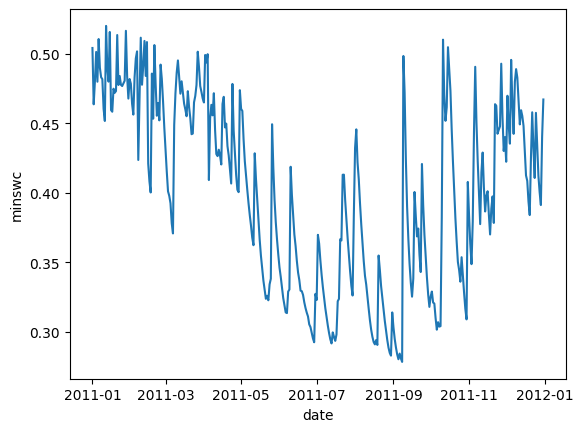

In [38]:
sns.lineplot(data=df_aux3, x='date', y='minswc')

<Axes: xlabel='date', ylabel='meanswc'>

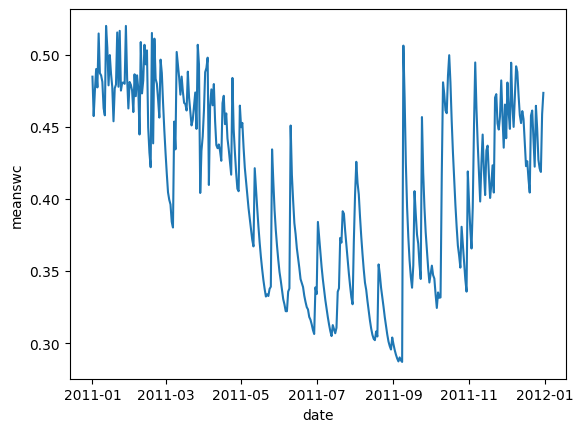

In [39]:
sns.lineplot(data=df_aux2, x='date', y='meanswc')

<Axes: xlabel='valid_time', ylabel='swvl1'>

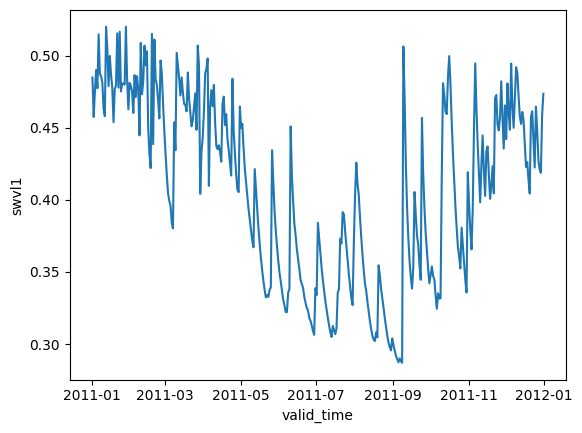

In [40]:
sns.lineplot(data=df_aux, x='valid_time', y='swvl1')